In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
img = cv2.imread("Lena_noisy.jpg",0)

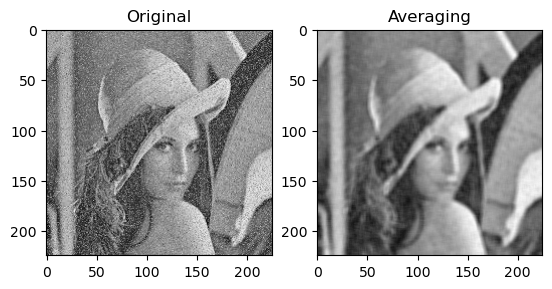

In [5]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img, cmap ="gray"),plt.title('Original')
plt.subplot(122),plt.imshow(dst, "gray"),plt.title('Averaging')
plt.show()

In [6]:
img_gauss = cv2.GaussianBlur(img,(5,5),0)

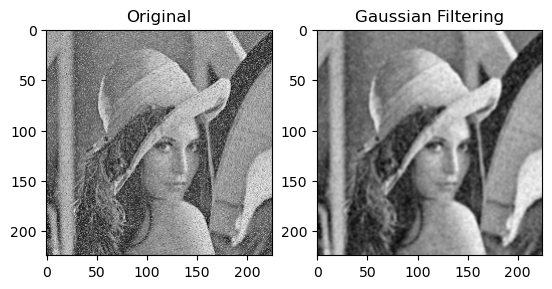

In [7]:
plt.subplot(121),plt.imshow(img, cmap ="gray"),plt.title('Original')
plt.subplot(122),plt.imshow(img_gauss, "gray"),plt.title('Gaussian Filtering')
plt.show()

In [8]:
img_med = cv2.medianBlur(img,7)

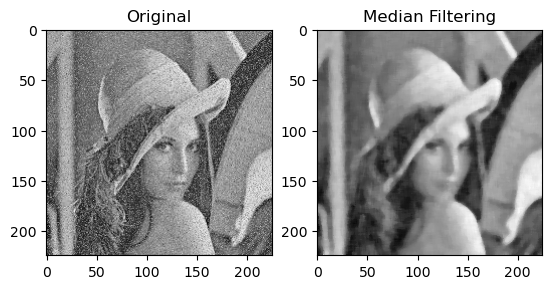

In [9]:
plt.subplot(121),plt.imshow(img, cmap ="gray"),plt.title('Original')
plt.subplot(122),plt.imshow(img_med, "gray"),plt.title('Median Filtering')
plt.show()

In [10]:
img = cv2.imread("coins.png",0)

In [11]:
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]],np.float32)

In [12]:
kernel

array([[ 0.,  1.,  0.],
       [ 1., -4.,  1.],
       [ 0.,  1.,  0.]], dtype=float32)

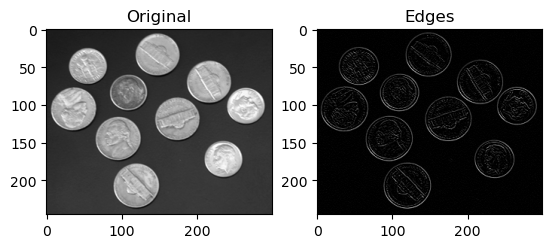

In [13]:
lap = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img, cmap ="gray"),plt.title('Original')
plt.subplot(122),plt.imshow(lap, "gray"),plt.title('Edges')
plt.show()

In [14]:
sharp = cv2.subtract(img,lap)

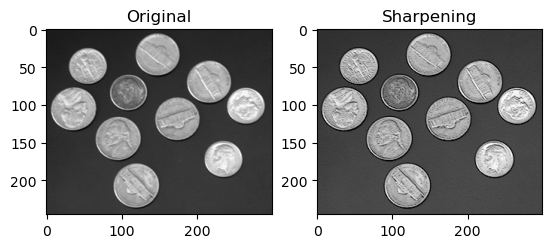

In [15]:
plt.subplot(121),plt.imshow(img, cmap ="gray"),plt.title('Original')
plt.subplot(122),plt.imshow(sharp, "gray"),plt.title('Sharpening')
plt.show()

In [16]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]],np.float32)

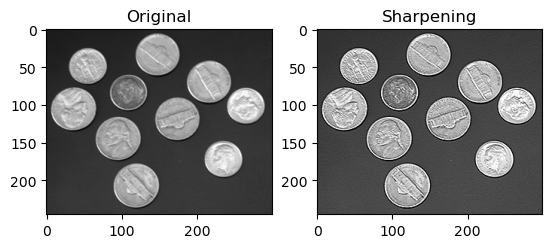

In [18]:
sharp = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img, cmap ="gray"),plt.title('Original')
plt.subplot(122),plt.imshow(sharp, "gray"),plt.title('Sharpening')
plt.show()

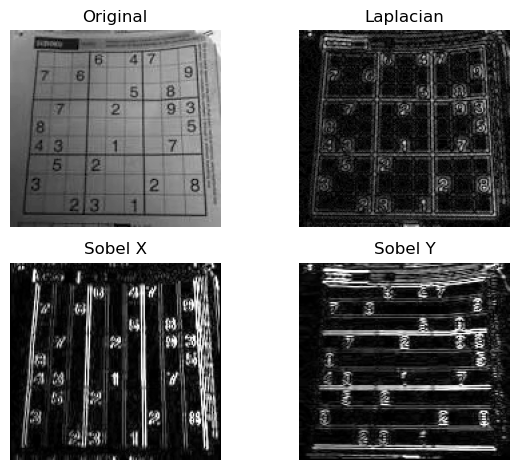

In [42]:

img = cv2.imread('pseudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"

# 1) Light denoising helps a lot for clean edges
#blur = cv2.GaussianBlur(img, (5,5), 0)

# 2) Laplacian (just for reference)
lap = cv2.Laplacian(blur, cv2.CV_64F)
lap = cv.convertScaleAbs(lap)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
#sobelx = cv2.normalize(sobelx, None, 0, 255, cv2.NORM_MINMAX)
sobelx =  cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
#sobely = cv2.normalize(sobely, None, 0, 255, cv2.NORM_MINMAX)
sobely =  cv2.convertScaleAbs(sobely)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.axis("off")
plt.subplot(2,2,2),plt.imshow(lap,cmap = 'gray')
plt.title('Laplacian'), plt.axis("off")
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.axis("off")
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.axis("off")
plt.tight_layout(); plt.show()


In [27]:
laplacian.dtype

dtype('float64')

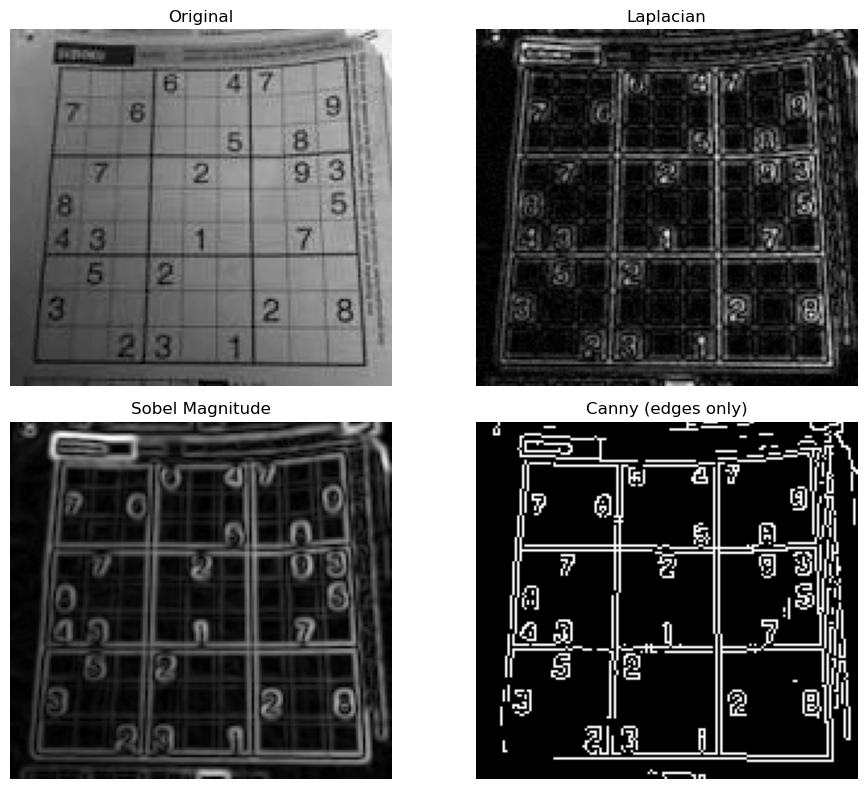

In [46]:
import cv2 as cv


img = cv.imread('pseudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"

# 1) Light denoising helps a lot for clean edges
blur = cv.GaussianBlur(img, (5,5), 1.2)

# 2) Laplacian (just for reference)
lap = cv.Laplacian(blur, cv.CV_64F, ksize=3)
lap = cv.convertScaleAbs(lap)

# 3) Sobel X/Y -> gradient magnitude (edges only, less clutter than raw X or Y)
sx = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize=3)
sy = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize=3)
mag = cv.magnitude(sx, sy)                  # sqrt(sx^2 + sy^2)
#mag = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
mag = cv.convertScaleAbs(mag)
mag = mag.astype(np.uint8)

# 4) Canny (recommended for “edges alone”)
# Auto thresholds from image median (tweak sigma if needed)

canny = cv.Canny(img,150,200)
 

# Show results
plt.figure(figsize=(10,8))
plt.subplot(2,2,1); plt.imshow(img, cmap='gray');  plt.title('Original');  plt.axis('off')
plt.subplot(2,2,2); plt.imshow(lap, cmap='gray');  plt.title('Laplacian'); plt.axis('off')
plt.subplot(2,2,3); plt.imshow(mag, cmap='gray');  plt.title('Sobel Magnitude'); plt.axis('off')
plt.subplot(2,2,4); plt.imshow(canny, cmap='gray');plt.title('Canny (edges only)'); plt.axis('off')
plt.tight_layout(); plt.show()


Before stretching: min = 0 max = 226
After stretching: min = 0 max = 255


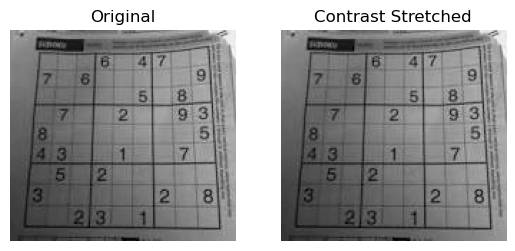

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale
img = cv2.imread("pseudoku.png", cv2.IMREAD_GRAYSCALE)

# Get min and max pixel values
min_val = np.min(img)
max_val = np.max(img)

print("Before stretching: min =", min_val, "max =", max_val)

# Contrast stretching: scale to 0–255
stretched = (img - min_val) * (255.0 / (max_val - min_val))
stretched = stretched.astype(np.uint8)

print("After stretching: min =", np.min(stretched), "max =", np.max(stretched))

# Display results
plt.subplot(1,2,1); plt.imshow(img, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(stretched, cmap="gray"); plt.title("Contrast Stretched"); plt.axis("off")
plt.show()


In [48]:
print("After stretching: min =", np.min(stretched), "max =", np.max(stretched))

After stretching: min = 0 max = 255
